In [90]:
f_path = "../rank_tests_ch_timing_results.json"

In [91]:
import json
import pandas as pd
import math

with open(f_path) as f:
    d = json.load(f)

d[0]

{'test_case': {'request': {'source': 363600, 'target': 453587},
  'weight': 797,
  'dijkstra_rank': 2},
 'timing_in_seconds': 3.0651e-05}

In [92]:
df = pd.DataFrame()
df["dijkstra rank"] = [x["test_case"]["dijkstra_rank"] for x in d]
df["time in seconds"] = [x["timing_in_seconds"] for x in d]

df.head()

,dijkstra rank,time in seconds
0,2,0.000031
1,3,0.000010
2,2,0.000006
3,3,0.000007
4,3,0.000010


In [115]:
# Create dictionary based on log2(rank)
dict_by_log2_rank = {}

for _, row in df.iterrows():
    log2_rank = int(round(math.log2(row["dijkstra rank"])))
    rank_rounded = f"2e{log2_rank}"
    if rank_rounded not in dict_by_log2_rank:
        dict_by_log2_rank[rank_rounded] = []
    dict_by_log2_rank[rank_rounded].append(row["time in seconds"])


# # Display the dictionary of DataFrames
# for key, value in dict_by_log2_rank.items():
#     this_df = pd.DataFrame(value)
#     this_df.reset_index(inplace=True)
#     dict_by_log2_rank[key] = this_df

/tmp/ipykernel_41757/2447708118.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


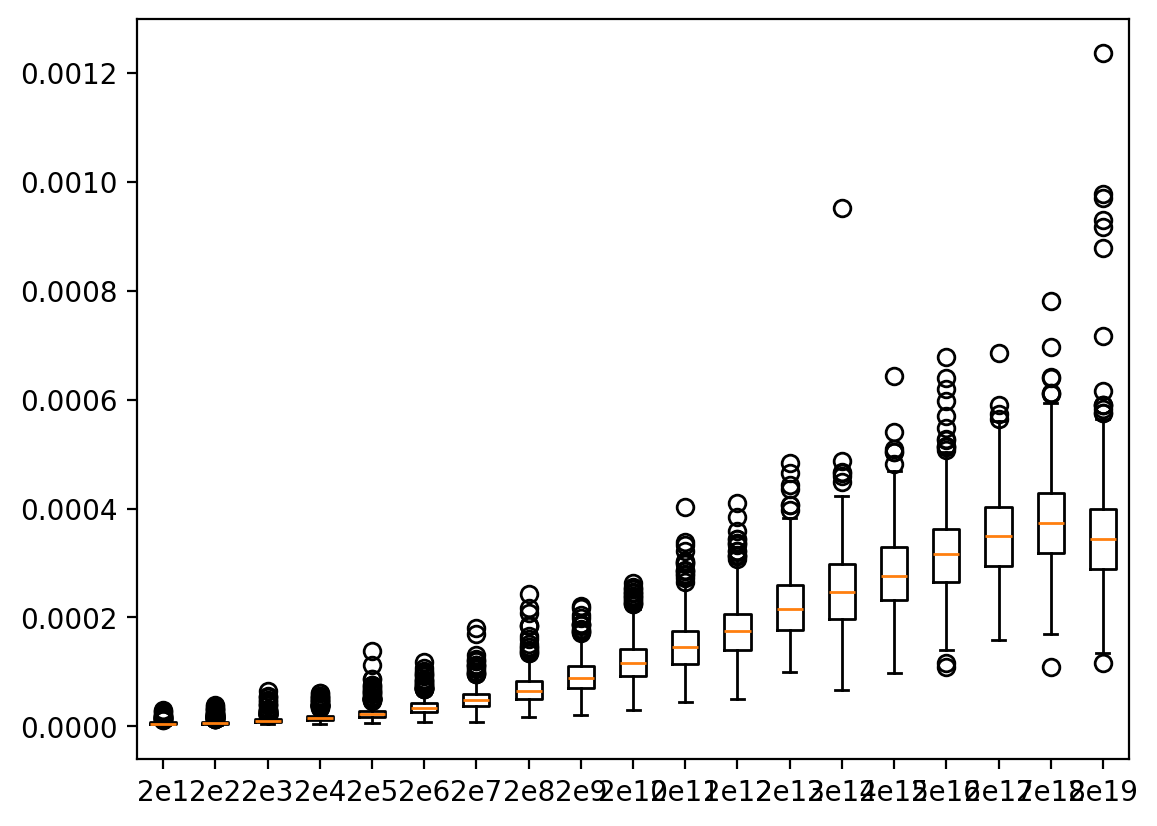

In [136]:
fig, ax = plt.subplots()
fig.set_dpi(200)

# Increase the space between boxplots by adjusting their positions
positions = list(range(1, len(dict_by_log2_rank) + 1))
width = 0.5  # Adjust the width to make the boxplots narrower

ax.boxplot(dict_by_log2_rank.values(), positions=positions, widths=width)
ax.set_xticklabels(dict_by_log2_rank.keys())

fig.show()

In [ ]:
avg_time = df["time in seconds"].mean()
avg_rank = df["dijkstra rank"].mean()

(avg_time, avg_rank)

(0.00016449284320592356, 68947.95487292376)

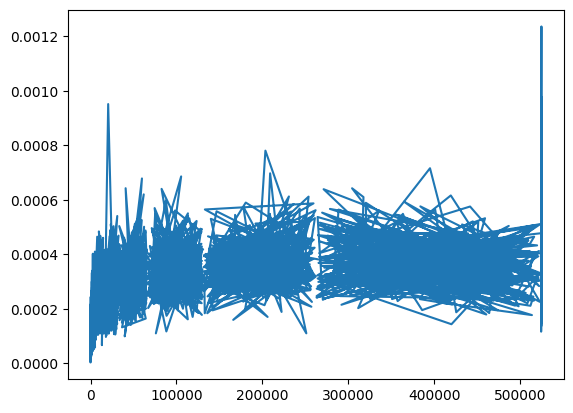

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df["dijkstra rank"], df["time in seconds"])

In [ ]:
ranks = [x["dijkstra_rank"] for x in d]
len(ranks)

KeyError: 'dijkstra_rank'

TypeError: LogScale.__init__() got an unexpected keyword argument 'basey'

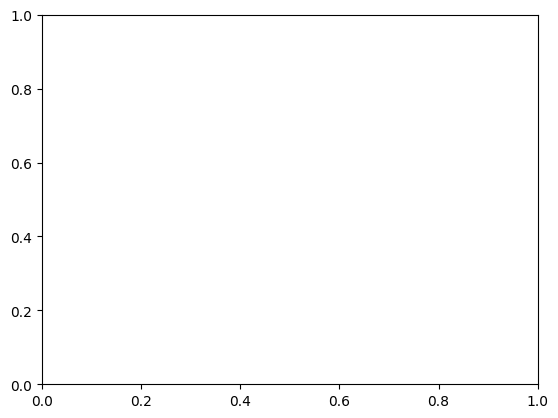

In [ ]:


fig, ax = plt.subplots()
ax.set_yscale('log', basey=2)
# plt.xscale('log', base=2)
plt.hist(ranks)
